# Heart Disease Dataset

The Heart-Disease-Dataset database consists of 76 attributes, but only a subset of 14 attributes has been utilized in all published experiments thus far. Among these experiments, ML researchers have exclusively employed the Cleveland database. The attribute labeled "goal" indicates the presence of heart disease in a patient and is represented by an integer ranging from 0 (indicating no presence) to 4. Previous studies conducted using the Cleveland database have primarily focused on distinguishing between the presence (values 1, 2, 3, 4) and absence (value 0) of heart disease.


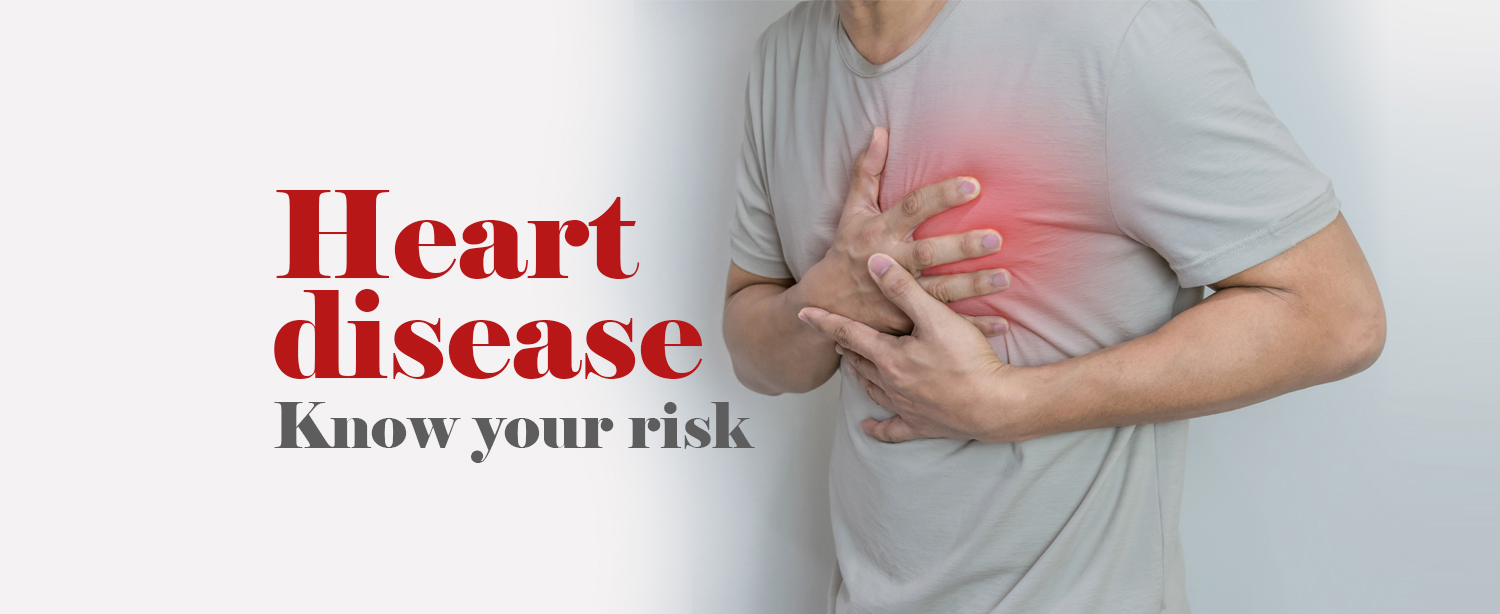

* **About dataset:**

1. **Age (#):** Age of the individual.

2. **Sex (Binary):** Gender of the individual.
- 1: Male
- 0: Female

3. **Chest Pain Type** (Ordinal): Type of chest pain.
- 1: Typical Angina
- 2: Atypical Angina
- 3: Non-Anginal Pain
- 4: Asymptomatic

4. **Resting Blood Pressure (#):** Resting blood pressure measurement.

5. **Serum Cholesterol (mg/dl) (#):** Serum cholesterol level in milligrams per deciliter.

6. **Fasting Blood Sugar (Binary):** Fasting blood sugar level.
- 1: > 120 mg/dl (True)
- 0: <= 120 mg/dl (False)

7. **Resting Electrocardiography Results:**
- 0: "Normal"
- 1: "ST-T Abnormality"
- 2: "Left Ventricular Hypertrophy"

8. **Maximum Heart Rate Achieved (#):** Maximum heart rate achieved during exercise.

9. **Exercise Induced Angina (Binary):** Whether exercise induced angina occurred.
- 1: Yes
- 0: No

10. **ST Depression Induced by Exercise (#):** ST depression induced by exercise relative to rest.

11. **Slope of Peak Exercise ST Segment (Ordinal):**
- 1: Up Sloping
- 2: Flat
- 3: Down Sloping

12. **Number of Major Vessels (Ordinal):** Number of major vessels colored by fluoroscopy.
- 0-3: (Ordinal)

13. **Thal (Ordinal):** Maximum heart rate achieved.
- 3: Normal
- 6: Fixed Defect
- 7: Reversible Defect

14. "Target (Binary)**: 
- 1: Disease 
- 0: No_disease
Note: The data types include Continuous (Quantitative), Ordinal (Categorical with order), and Binary (Two possible states: 0 and 1).

# Importing the Necessary Packages

In [1]:
# For Data Analysis and Mathamatical Function using the below Lib:-
import numpy as np 
import pandas as pd


#Data Visualization Libraries
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import matplotlib.patches as mpatches

#Remving the Warning 
import warnings
warnings.filterwarnings('ignore')

#for spliting the data using the below lib
from sklearn.model_selection import cross_val_score

#for Data Encoding
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

#for Normalizing and standardization of the data
from sklearn.preprocessing import MinMaxScaler,StandardScaler

#Machine Learning models Libraries: 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score,auc,roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [2]:
heart_df = pd.read_csv(r"C:\Users\EXPERT\Desktop\Ineubytes Internship\Heart Disease ipnb file\heart.csv")
df = heart_df.copy()
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


#### Insights:
* we have the basic look at the data 
    - heart disease data has 1025 rows and 14 columns.

# 🔍 Opening the Data Vault: Basic EDA:

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


#### Insights:
* Through the utilization of the Pandas head() and tail() functions, no unusual patterns or behaviors are observed within the dataset. This includes the absence of NaN values or any instances of missing data.

### Statistical View of the Data

In [5]:
df.describe(include="all")

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### Insights:
* This approach offers a rapid overview of fundamental statistics related to the numerical columns within the DataFrame.
* It furnishes a statistical perspective of the dataset, a resource crucial for effective work within the dataset.

#### Dropping the Duplicate's

In [6]:
# Removing the duplicates if existed in the dataset
print(df.shape)
df = df.drop_duplicates()
print(df.shape)

(1025, 14)
(302, 14)


#### Insight's:
* "Remarkably, a rigorous deduplication process led to the removal of approximately two-thirds of the data. This culling, while substantial in quantity, contributed to the preservation of data quality, ensuring that the remaining dataset is of superior integrity and well-suited for insightful analysis."

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


#### Insight's:
-  The DataFrame contains 302 entries and is indexed using the Int64Index.
- A total of 14 columns are present in the dataset, each representing specific features.
- All columns exhibit non-null values, indicating the absence of missing data.
- The data types within the DataFrame fall into two categories: float64 and int64.
- The presence of float64 indicates the inclusion of continuous variables, while int64 represents categorical variables.
- The memory usage for this well-structured DataFrame amounts to 35.4 KB.

### Changing the Data Types for Better Optimization

In [8]:
# Enhancing Data Type Optimization for Improved Analysis

# To further refine our dataset for analysis, we're strategically converting categorical features to categorical data types. This process optimizes memory usage and allows for better representation of the inherent characteristics of these variables.

df['sex'] = df['sex'].astype('category')
df['cp'] = df['cp'].astype('category')
df['fbs'] = df['fbs'].astype('category')
df['restecg'] = df['restecg'].astype('category')
df['exang'] = df['exang'].astype('category')
df['slope'] = df['slope'].astype('category')
df['ca'] = df['ca'].astype('category')
df['thal'] = df['thal'].astype('category')

# Displaying the refined data types
print(df.dtypes)

age            int64
sex         category
cp          category
trestbps       int64
chol           int64
fbs         category
restecg     category
thalach        int64
exang       category
oldpeak      float64
slope       category
ca          category
thal        category
target         int64
dtype: object


### Changing the Feature Names 

In [9]:
# rename the features to a more readable feature names for us afterward's we will change as industry Requirement.
print(df.shape)
df = df.rename(columns={
    "age"     : "Age",
    "sex"     : "Gender",
    'cp'      : "Chest_Pain",
    "trestbps": "Resting_BP",
    'chol'    : "Cholestrol",
    "fbs"     : "Fasting_Blood_Sugar",
    "restecg" : "Resting_ECG",
    'thalach' : "Max_HeartRate_Acheived_1",
    "exang"   : "exercise_induced_angina",
    'oldpeak' : "ST_depression",
    "slope"   : "ST_Slope",
    "ca"      : "Num_Major_Vessels",
    "thal"    : "Max_HeartRate_Acheived_2",
    "target"  : "Outcome",
    })
df

(302, 14)


,Age,Gender,Chest_Pain,Resting_BP,Cholestrol,Fasting_Blood_Sugar,Resting_ECG,Max_HeartRate_Acheived_1,exercise_induced_angina,ST_depression,ST_Slope,Num_Major_Vessels,Max_HeartRate_Acheived_2,Outcome
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


#### Insights:
At this juncture, you might be curious about the rationale behind our field name adjustments.

The motive is rooted in enhancing accessibility: by transforming complex medical terminologies into more comprehensible terms, we streamline our workflow.

This proactive approach not only saves time but also offers immediate clarity – enabling us to swiftly grasp the essence of each field name's significance.

In [10]:
df

,Age,Gender,Chest_Pain,Resting_BP,Cholestrol,Fasting_Blood_Sugar,Resting_ECG,Max_HeartRate_Acheived_1,exercise_induced_angina,ST_depression,ST_Slope,Num_Major_Vessels,Max_HeartRate_Acheived_2,Outcome
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


#### Re-Seting the Index 

In [11]:
df.reset_index(inplace=True)
df.drop("index",axis=1,inplace=True)
df

,Age,Gender,Chest_Pain,Resting_BP,Cholestrol,Fasting_Blood_Sugar,Resting_ECG,Max_HeartRate_Acheived_1,exercise_induced_angina,ST_depression,ST_Slope,Num_Major_Vessels,Max_HeartRate_Acheived_2,Outcome
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
298,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
299,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
300,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


#### Insight's:
* Resetting the index after duplicate removal streamlines data interpretation.
* Removal of duplicates caused disruptions in index values (e.g., 723, 733).
* Resetting the index establishes a contiguous, well-ordered index range.
* This aligns harmoniously with the refined dataset of 302 rows.
* Result: Smooth data examination, focusing on insights rather than index irregularities.

# 🖼️ Painting with Data: Crafting Insights through Visual Exploration 🖼

In [12]:
# Copying the df so that sometime's we do mistake and we had to start from the start
df1 = df.copy()     
df1

,Age,Gender,Chest_Pain,Resting_BP,Cholestrol,Fasting_Blood_Sugar,Resting_ECG,Max_HeartRate_Acheived_1,exercise_induced_angina,ST_depression,ST_Slope,Num_Major_Vessels,Max_HeartRate_Acheived_2,Outcome
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
298,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
299,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
300,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [13]:
# change the labelling for better interpretation/ visualization understanding

df1['Outcome'] = df1.Outcome.replace({1: "Disease", 0: "No_disease"})
df1['Gender'] = df1.Gender.replace({1: "Male", 0: "Female"})
df1['Chest_Pain'] = df1.Chest_Pain.replace({0: "Typical_angina", 
                          1: "Atypical_angina", 
                          2:"Non-anginal pain",
                          3: "Asymtomatic"})
df1['Resting_ECG'] = df1.Resting_ECG.replace({0: "Normal",
                        1: "ST-T Abnormality",
                        2: "Left Ventricular Hypertrophy"})

df1['exercise_induced_angina'] = df1.exercise_induced_angina.replace({1: "Yes", 0: "No"})
df1['ST_Slope'] = df1.ST_Slope.replace({1: "Upsloping", 
                          2: "Flat", 
                          3:"Downsloping"})
df1['Max_HeartRate_Acheived_2'] = df1.Max_HeartRate_Acheived_2.replace({1: "Fixed_defect", 2: "Reversable_Defect", 3:"Normal"})

#### Insight's:
**Transformation for Enhanced Visualization:**

* Numerical values in specific columns have been transformed into categorical labels.
    * For instance, 'Chest_Pain' now includes categories like 'Typical_angina,' 'Atypical_angina,' 'Non-anginal pain,' and 'Asymptomatic.'
    * 'exercise_induced_angina' has been converted to 'Yes' and 'No' categories.
    * 'ST_Slope' has been categorized as 'Upsloping,' 'Flat,' and 'Downsloping.'

**Streamlined Visualization Process:**

* This transformation eliminates the need to customize numerical labels during data visualization.
* Matplotlib and Seaborn can now seamlessly utilize the categorical labels.

**Enriched Data Interpretation:**

* By employing descriptive labels, the depth of insights derived from visualizations is enhanced.
* Understanding and conveying information becomes more intuitive and meaningful.

### Function's For Data Visualization

In [14]:
# Function that will return the value count and frequency of each observation with in the Feature

def value_cnt_norm_cal(df,feature):
    ftr_value_cnt = df[feature].value_counts()
    ftr_value_cnt_norm = df[feature].value_counts(normalize=True) * 100
    ftr_value_cnt_concat = pd.concat([ftr_value_cnt,ftr_value_cnt_norm],axis=1)
    ftr_value_cnt_concat.columns = ["Count","Frequency(%)"]
    return ftr_value_cnt_concat

#### Insight's:
**Comprehensive Observation Analysis:**

* This function offers a two-fold benefit.
*It provides the value count for each observation of every feature.
* Simultaneously, it furnishes the frequency distribution of these observations.

In [15]:
def gen_info_feat(df,feature):    
        print('Description:\n{}'.format(df[feature].describe()))
        print('*'*50)
        print('Object type:\n{}'.format(df[feature].dtype))
        print('*'*50)
        value_cnt = value_cnt_norm_cal(df,feature)
        print('Value count:\n{}'.format(value_cnt))

#### Insight's:
**Holistic Target Variable Analysis:**

* This feature offers a comprehensive statistical summary concerning the target variable.
* The summary encompasses count, uniqueness, most frequent value (top), and its frequency (freq).
* Additionally, a detailed value count is provided for the target variable.

In [16]:
def create_bar_chart(df, feature, fontsize=15):
    # Count the occurrences of each feature value
    feature_counts = df[feature].value_counts()

    # Using Seaborn's color palette
    colors = sns.color_palette("pastel")

    # Create the bar chart
    plt.figure(figsize=(8, 6))
    bars = plt.bar(feature_counts.index, feature_counts.values, color=colors)

    # Add labels and title
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(f'Distribution of {feature} in Heart Disease Dataset')
    plt.xticks(feature_counts.index)  # Use the original feature values on the x-axis

    # Display the plot
    plt.tight_layout()
    plt.show()


#### Insight's:
**Effortless Visualization with Bar Charts:**
* This approach simplifies the process of generating bar charts.
* Just by specifying the dataset and feature name, a bar chart is effortlessly produced.

**Streamlined Data Exploration:**
* The BarChart creation process is made more intuitive and efficient.
* Visualizing feature distributions becomes a seamless experience.

**Enhanced Data Communication:**
* By easily generating bar charts, conveying insights to others is made smoother.
* It aids in sharing valuable information in a visually appealing manner.

# 📊 Univariate Analysis: Exploring Individual Attributes 📊

### Visual Exploration of "Outcome" Field Name" 📈

In [17]:
gen_info_feat(df1,"Outcome")

Description:
count         302
unique          2
top       Disease
freq          164
Name: Outcome, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
            Count  Frequency(%)
Outcome                        
Disease       164     54.304636
No_disease    138     45.695364


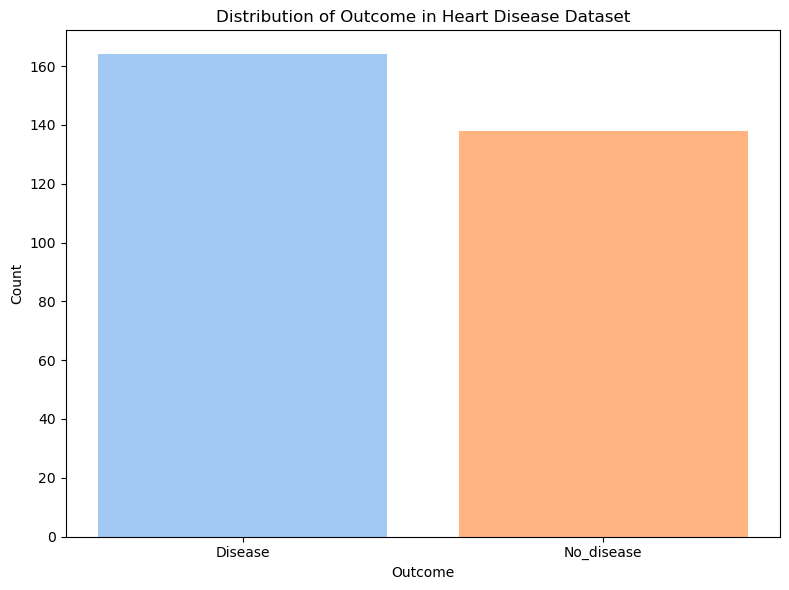

In [18]:
create_bar_chart(df1,"Outcome")

#### Insights:
**Outcome Distribution Insights:**

* The 'Outcome' column contains a total of 302 observations.
* It comprises two unique values: 'Disease' and 'No_disease.'
* 'Disease' is the dominant outcome, occurring 164 times with a frequency of approximately 54.30%.
* Conversely, 'No_disease' appears 138 times, constituting around 45.70% of the dataset.

**Visualizing Proportions:**
* The visualization offers a clear depiction of outcome proportions.
* A swift understanding of the distribution of health conditions is achievable.

**Data Snapshot:**
* This analysis provides a succinct snapshot of the dataset's health condition composition.
* It aids in grasping the dataset's health condition distribution efficiently.

### Visual Exploration of "Chest_Pain" Field Name" 📈

In [19]:
gen_info_feat(df1,"Chest_Pain")

Description:
count                302
unique                 4
top       Typical_angina
freq                 143
Name: Chest_Pain, dtype: object
**************************************************
Object type:
category
**************************************************
Value count:
                  Count  Frequency(%)
Chest_Pain                           
Typical_angina      143     47.350993
Non-anginal pain     86     28.476821
Atypical_angina      50     16.556291
Asymtomatic          23      7.615894


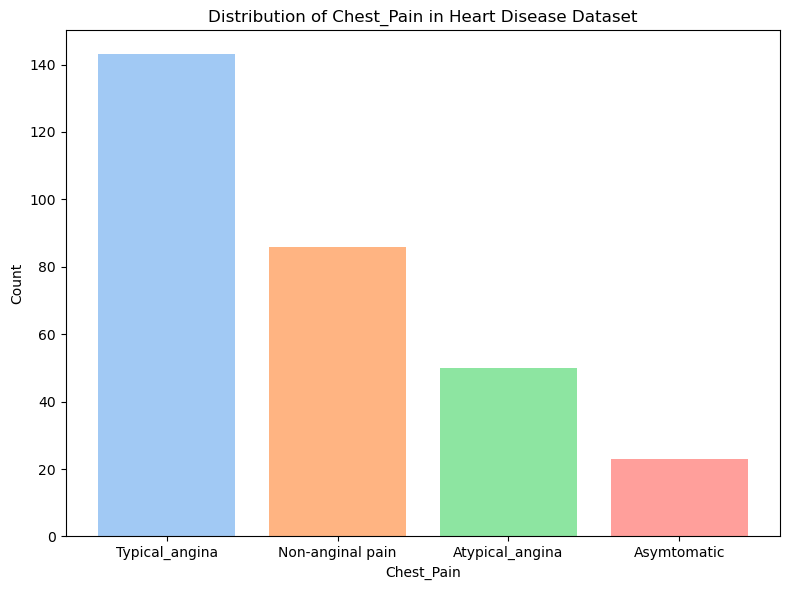

In [20]:
create_bar_chart(df1,"Chest_Pain")

#### Insight's:
**"Chest_Pain" Column Insights:**
* The "Chest_Pain" column encompasses 302 observations.
* It features four unique categories: "Typical_angina," "Non-anginal pain," "Atypical_angina," and "Asymptomatic."
* "Typical_angina" is the most frequent category, appearing 143 times, accounting for about 47.35%.
* The distribution of other categories includes:
* "Non-anginal pain" with 86 occurrences (about 28.48%)
* "Atypical_angina" with 50 occurrences (around 16.56%)
* "Asymptomatic" with 23 occurrences (approximately 7.62%).

**Category Breakdown:**     

* The data provides a clear breakdown of the prevalence of different chest pain types.
* "Typical_angina" is the most common, followed by "Non-anginal pain," "Atypical_angina," and "Asymptomatic."

**Data Snapshot:** 
* This analysis offers a snapshot of the distribution of chest pain categories in the dataset.
* It aids in quickly understanding the prevalence of different types of chest pain.

### Visual Exploration of "Resting_ECG" Field Name" 📈

In [21]:
gen_info_feat(df1,"Resting_ECG")

Description:
count                  302
unique                   3
top       ST-T Abnormality
freq                   151
Name: Resting_ECG, dtype: object
**************************************************
Object type:
category
**************************************************
Value count:
                              Count  Frequency(%)
Resting_ECG                                      
ST-T Abnormality                151     50.000000
Normal                          147     48.675497
Left Ventricular Hypertrophy      4      1.324503


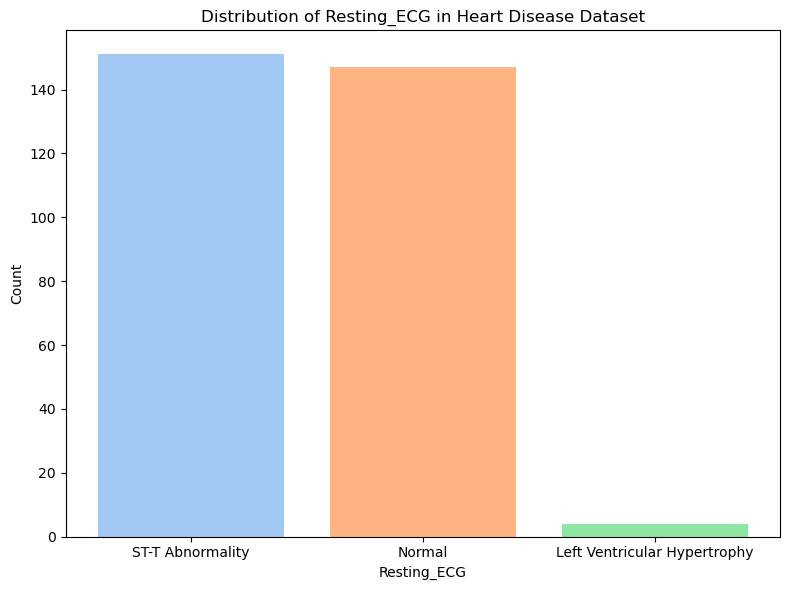

In [22]:
create_bar_chart(df1,"Resting_ECG")

#### Resting Electrocardiography Results Insights:

**The "Resting ECG" column contains 302 observations.**
* There are three unique values: "ST-T Abnormality," "Normal," and "Left Ventricular Hypertrophy."
* "ST-T Abnormality" is the most frequent outcome, appearing 151 times, accounting for 50%.
* The distribution of other results includes:
* "Normal" with 147 occurrences (about 48.68%)
* "Left Ventricular Hypertrophy" with 4 occurrences (around 1.32%).

**Distinct ECG Readings:**
* The column represents three distinct resting ECG readings.
* "ST-T Abnormality" is the most common reading, followed by "Normal" and "Left Ventricular Hypertrophy."

**Value Distribution:** 
* This analysis offers insights into the distribution of resting ECG results in the dataset.
* It aids in understanding the prevalence of different ECG readings.

### Visual Exploration of "Resting_ECG" Field Name" 📈

In [23]:
gen_info_feat(df1,'exercise_induced_angina')

Description:
count     302
unique      2
top        No
freq      203
Name: exercise_induced_angina, dtype: object
**************************************************
Object type:
category
**************************************************
Value count:
                         Count  Frequency(%)
exercise_induced_angina                     
No                         203     67.218543
Yes                         99     32.781457


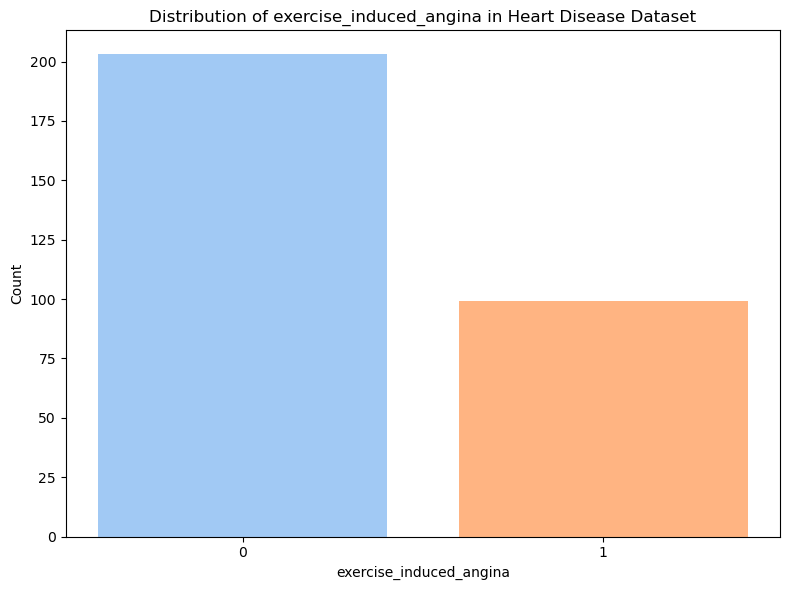

In [24]:
create_bar_chart(df,"exercise_induced_angina")

#### Insight's:

* The 'exercise_induced_angina' column contains 302 observations.
* There are two unique values: 'No' and 'Yes'.
* 'No' is the predominant outcome, occurring 203 times and constituting approximately 67.22%.
* The distribution of the other outcome is:'Yes' with 99 occurrences, making up around 32.78%.

**Angina Occurrence:**

* The column reflects whether exercise induced angina occurred.
* A majority of cases (67.22%) are characterized by the absence of exercise-induced angina ('No').

**Occurrence Distribution:**
* This analysis provides insights into the prevalence of exercise-induced angina occurrences in the dataset.
* It aids in understanding the distribution of angina responses.

### Visual Exploration of "Num_Major_Vessels" Field Name" 📈

In [25]:
gen_info_feat(df1,"Num_Major_Vessels")

Description:
count     302
unique      5
top         0
freq      175
Name: Num_Major_Vessels, dtype: int64
**************************************************
Object type:
category
**************************************************
Value count:
                   Count  Frequency(%)
Num_Major_Vessels                     
0                    175     57.947020
1                     65     21.523179
2                     38     12.582781
3                     20      6.622517
4                      4      1.324503


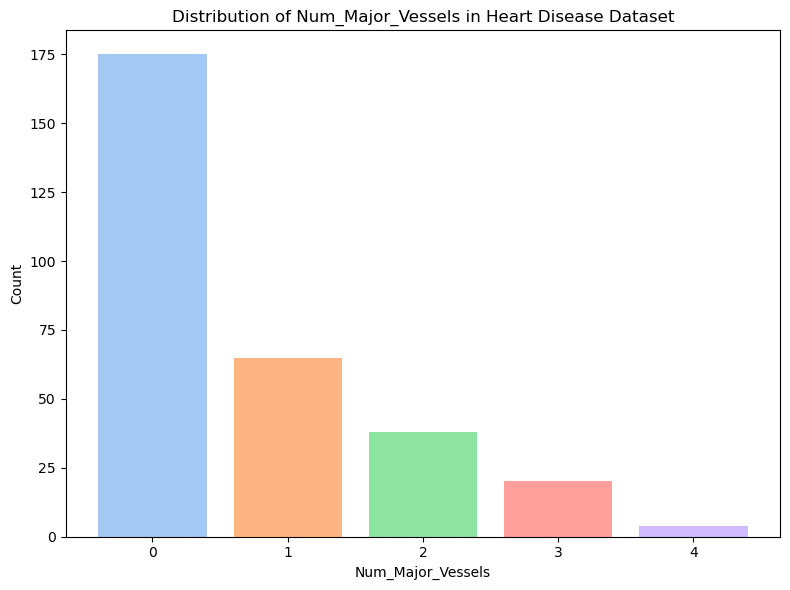

In [26]:
create_bar_chart(df,"Num_Major_Vessels")

#### Insights:

* The 'Num_Major_Vessels' column comprises 302 observations.
* There are five unique values, ranging from 0 to 4.
* '0' is the most common value, appearing 175 times and constituting approximately 57.95%.

**The distribution of other values is as follows:**
* '1' with 65 occurrences (about 21.52%)
* '2' with 38 occurrences (around 12.58%)
* '3' with 20 occurrences (approximately 6.62%)
* '4' with 4 occurrences (about 1.32%).

**Major Vessel Count:**
* The column indicates the number of major vessels colored by fluoroscopy.
* '0' is the most prevalent count, indicating the absence of major vessels.

**Distribution Spectrum:**
* This analysis offers insights into the distribution of major vessel counts.
* It aids in understanding the prevalence of different numbers of major vessels.

#### Visual Exploration of "Max_HeartRate_Acheived_2" Field Name" 📈

In [27]:
gen_info_feat(df1,"Max_HeartRate_Acheived_2")

Description:
count                   302
unique                    4
top       Reversable_Defect
freq                    165
Name: Max_HeartRate_Acheived_2, dtype: object
**************************************************
Object type:
category
**************************************************
Value count:
                          Count  Frequency(%)
Max_HeartRate_Acheived_2                     
Reversable_Defect           165     54.635762
Normal                      117     38.741722
Fixed_defect                 18      5.960265
0                             2      0.662252


# 📊📈 Multivariate Analysis: Unveiling Patterns Across Attributes 📈📊

### Gender

Text(0.5, 1.0, 'Disease classes according to Gender')

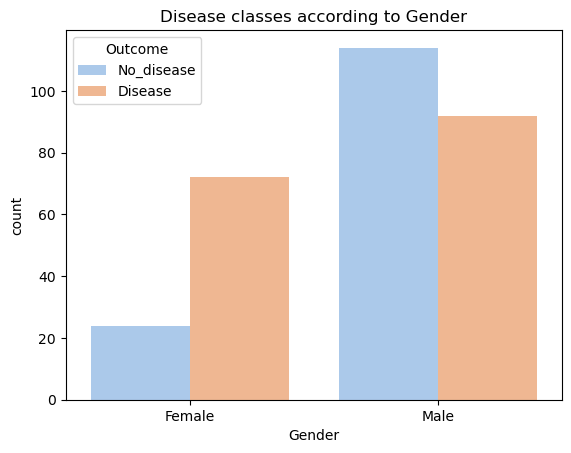

In [28]:
sns.countplot(x="Gender",hue='Outcome',data=df1,palette="pastel").set_title('Disease classes according to Gender')

### Chest Pain

Text(0.5, 1.0, 'Disease classes according to Chest Pain')

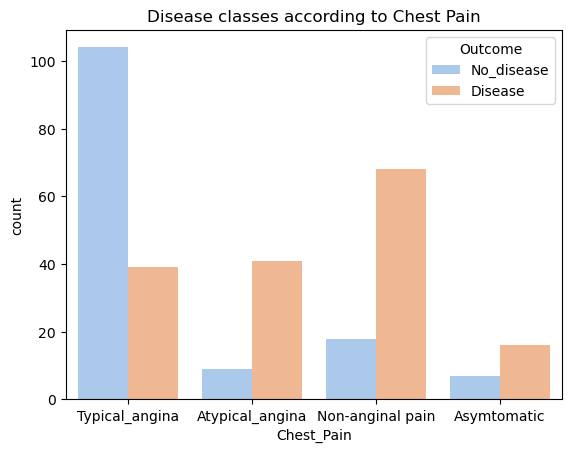

In [29]:
sns.countplot(x="Chest_Pain",hue='Outcome',data=df1,palette="pastel").set_title('Disease classes according to Chest Pain')

### Max_HeartRate_Acheived_2

Text(0.5, 1.0, 'Disease classes according to Max_HeartRate_Acheived_2')

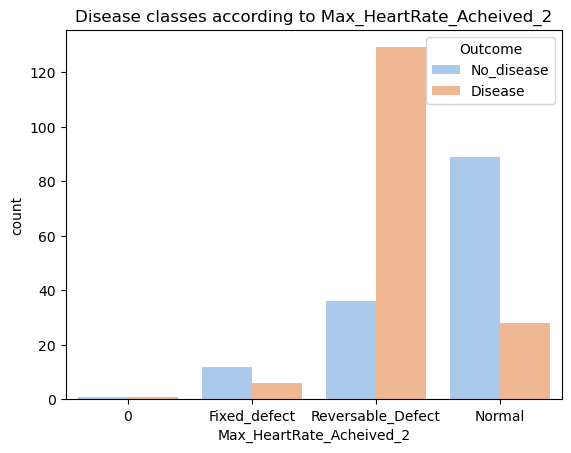

In [30]:
sns.countplot(x="Max_HeartRate_Acheived_2",hue='Outcome',data=df1,palette="pastel").set_title('Disease classes according to Max_HeartRate_Acheived_2')

## ST_Slope

Text(0.5, 1.0, 'Disease classes according to ST_Slope')

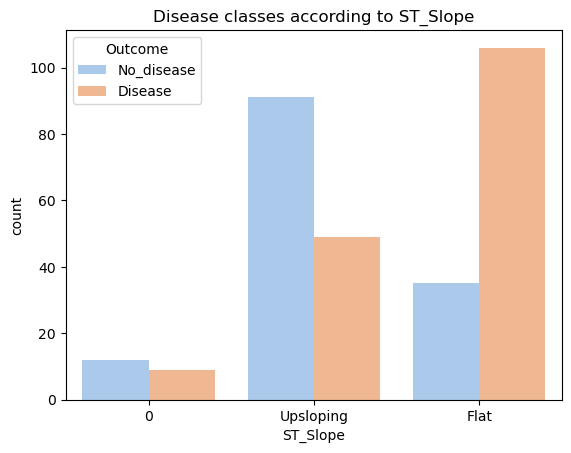

In [31]:
sns.countplot(x="ST_Slope",hue='Outcome',data=df1,palette="pastel").set_title('Disease classes according to ST_Slope')

### Num_Major_Vessels

Text(0.5, 1.0, 'Disease classes according to Num_Major_Vessels')

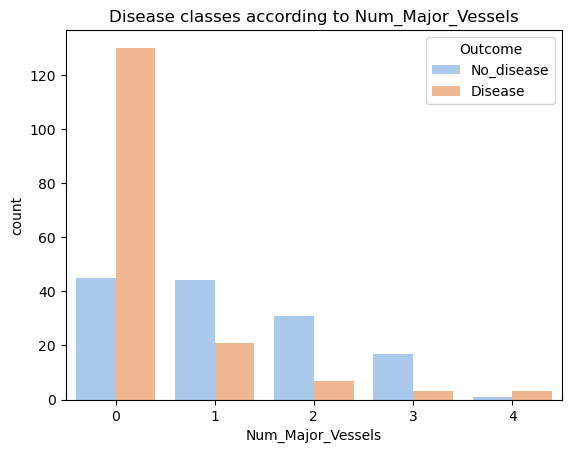

In [32]:
sns.countplot(x="Num_Major_Vessels",hue='Outcome',data=df1,palette="pastel").set_title('Disease classes according to Num_Major_Vessels')

## Visualize All toghther

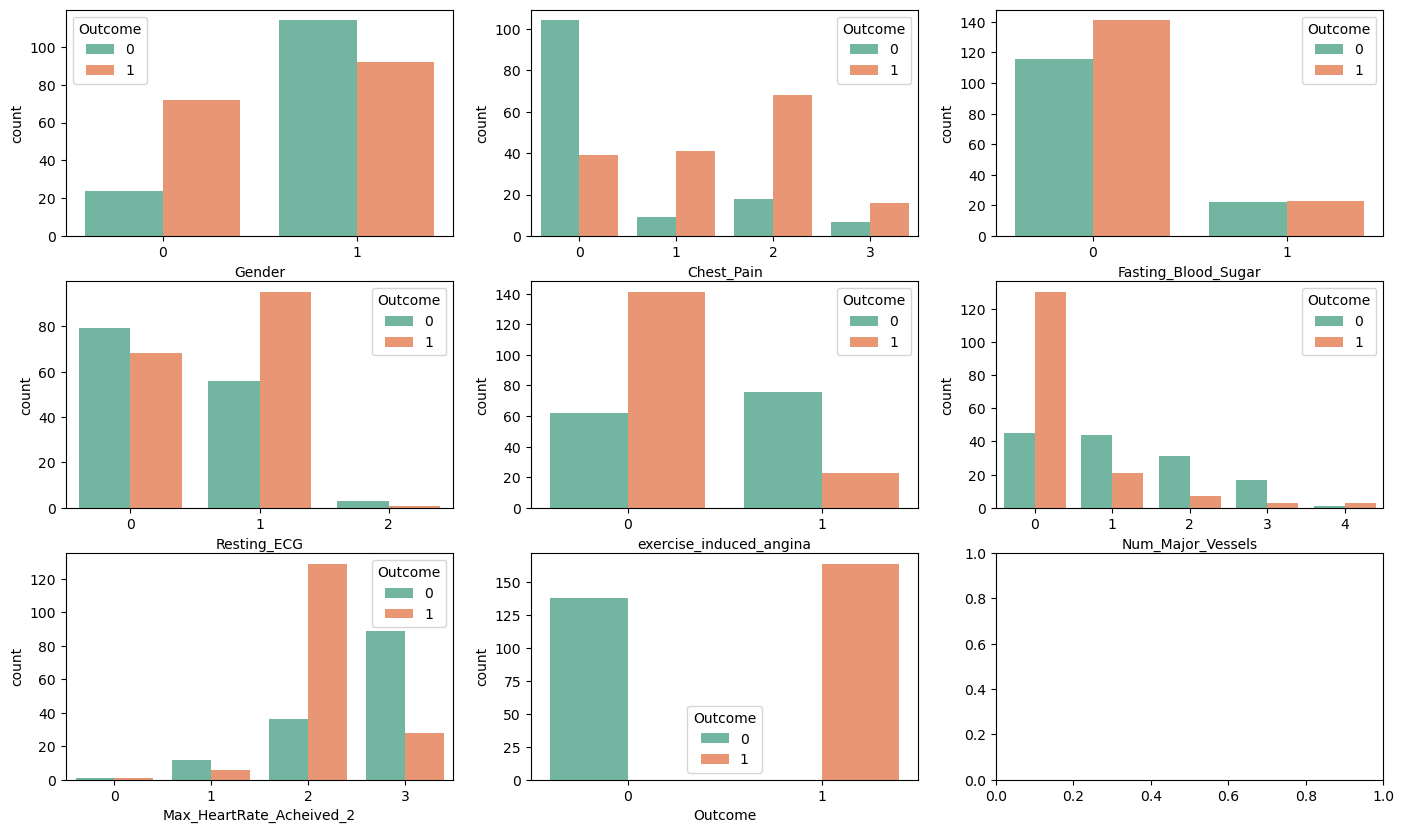

In [33]:
# for plotting, group categorical features in cat_feat
# to create dist in 8 feature, 9th is the target, 
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(17,10))
cat_feat = ['Gender', 'Chest_Pain', 'Fasting_Blood_Sugar', 'Resting_ECG',
            "exercise_induced_angina", 'Num_Major_Vessels', 'Max_HeartRate_Acheived_2',
            'Outcome']

for idx, feature in enumerate(cat_feat):
    ax = axes[int(idx/3), idx%3]
    if feature != 'target':
        sns.countplot(x=feature, hue='Outcome', data=df, ax=ax, palette='Set2')
     

(14.5, -0.5)

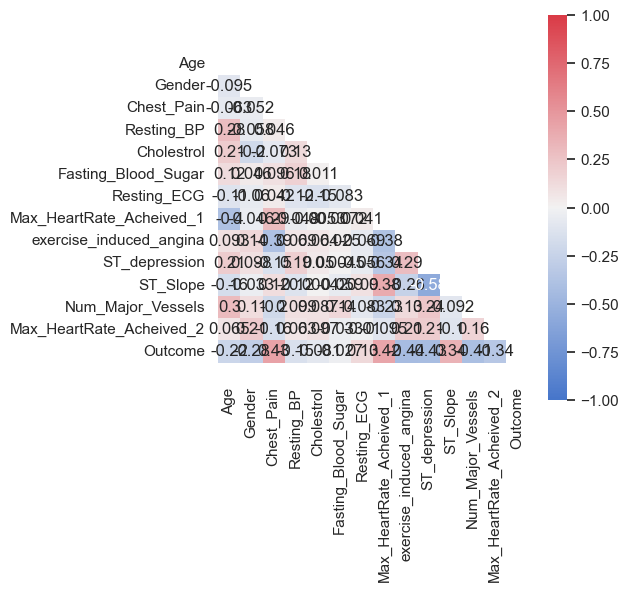

In [34]:
# Correlation with Heatmap Visualization 
sns.set(style="white") 
mask = np.zeros_like(df.corr(), dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

colors = sns.color_palette("pastel")
fig, ax = plt.subplots(figsize=(5,5))
cmap = sns.diverging_palette(255, 10, as_cmap=True)
sns.heatmap(df.corr(), mask=mask, annot=True, square=True, cmap=cmap,vmin=-1, vmax=1, ax=ax)  

bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)

## define continuous variable & plot


In [35]:
df1

,Age,Gender,Chest_Pain,Resting_BP,Cholestrol,Fasting_Blood_Sugar,Resting_ECG,Max_HeartRate_Acheived_1,exercise_induced_angina,ST_depression,ST_Slope,Num_Major_Vessels,Max_HeartRate_Acheived_2,Outcome
0,52,Male,Typical_angina,125,212,0,ST-T Abnormality,168,No,1.0,Flat,2,Normal,No_disease
1,53,Male,Typical_angina,140,203,1,Normal,155,Yes,3.1,0,0,Normal,No_disease
2,70,Male,Typical_angina,145,174,0,ST-T Abnormality,125,Yes,2.6,0,0,Normal,No_disease
3,61,Male,Typical_angina,148,203,0,ST-T Abnormality,161,No,0.0,Flat,1,Normal,No_disease
4,62,Female,Typical_angina,138,294,1,ST-T Abnormality,106,No,1.9,Upsloping,3,Reversable_Defect,No_disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,68,Female,Non-anginal pain,120,211,0,Normal,115,No,1.5,Upsloping,0,Reversable_Defect,Disease
298,44,Female,Non-anginal pain,108,141,0,ST-T Abnormality,175,No,0.6,Upsloping,0,Reversable_Defect,Disease
299,52,Male,Typical_angina,128,255,0,ST-T Abnormality,161,Yes,0.0,Flat,1,Normal,No_disease
300,59,Male,Asymtomatic,160,273,0,Normal,125,No,0.0,Flat,0,Reversable_Defect,No_disease


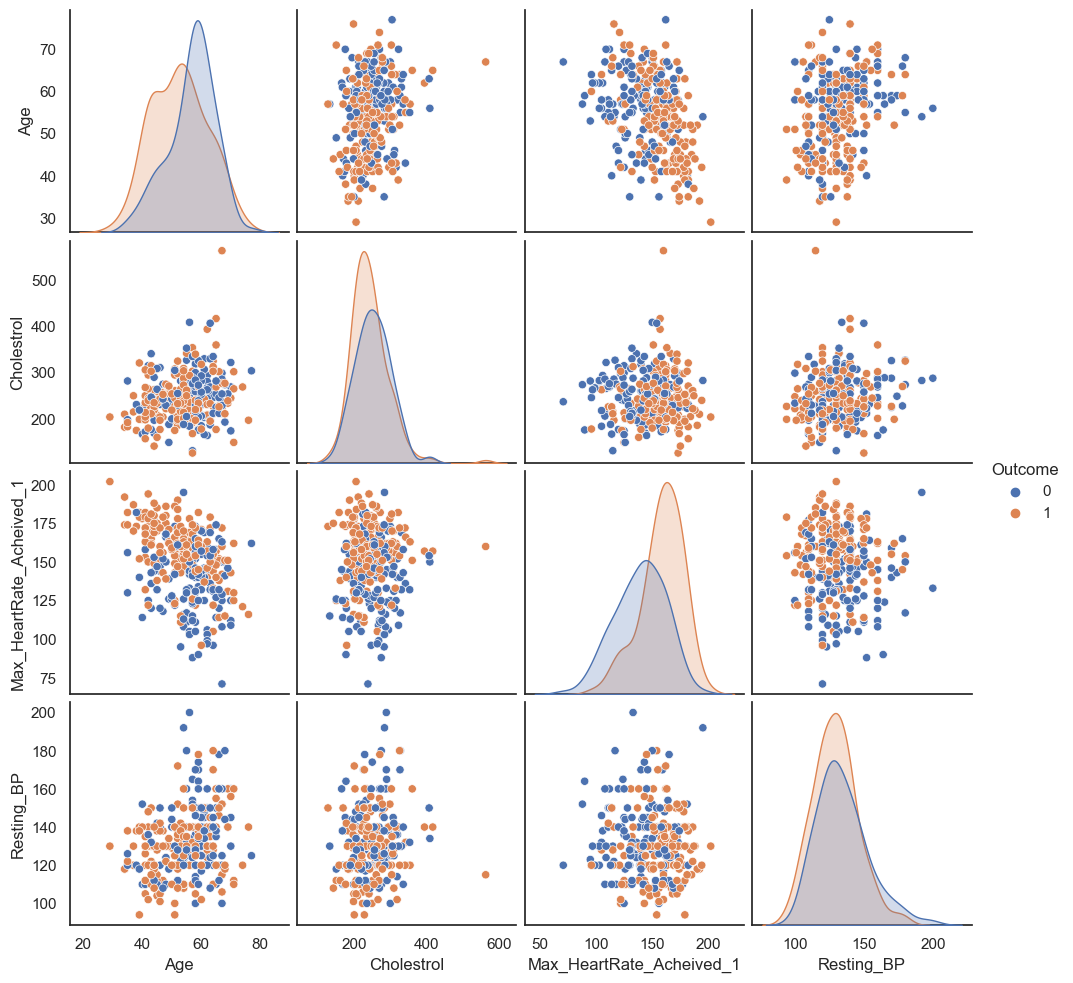

In [36]:
continous_features = ['Age', "Cholestrol", "Max_HeartRate_Acheived_1"
                      , "ST_Slope",'Resting_BP']  

colors = sns.color_palette("pastel")

sns.pairplot(df[continous_features + ['Outcome']], hue='Outcome')

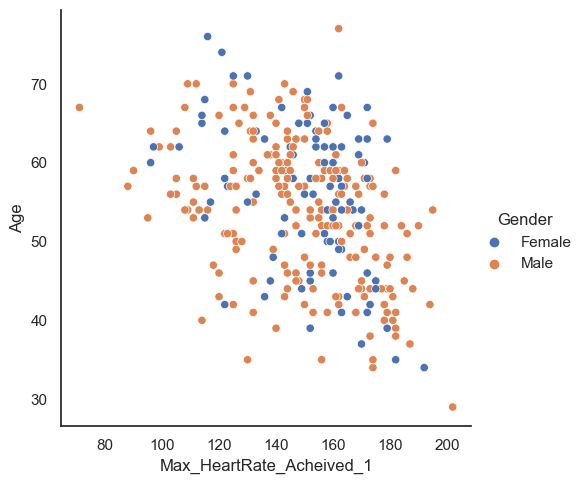

In [37]:
# relation plot relplot

colors = sns.color_palette("pastel")


sns.relplot(x="Max_HeartRate_Acheived_1", y = 'Age', hue='Gender', data=df1)

# 📊 Taming Outliers: Addressing Extreme Data Points 📊

In [38]:
df.columns

Index(['Age', 'Gender', 'Chest_Pain', 'Resting_BP', 'Cholestrol',
       'Fasting_Blood_Sugar', 'Resting_ECG', 'Max_HeartRate_Acheived_1',
       'exercise_induced_angina', 'ST_depression', 'ST_Slope',
       'Num_Major_Vessels', 'Max_HeartRate_Acheived_2', 'Outcome'],
      dtype='object')

<Axes: >

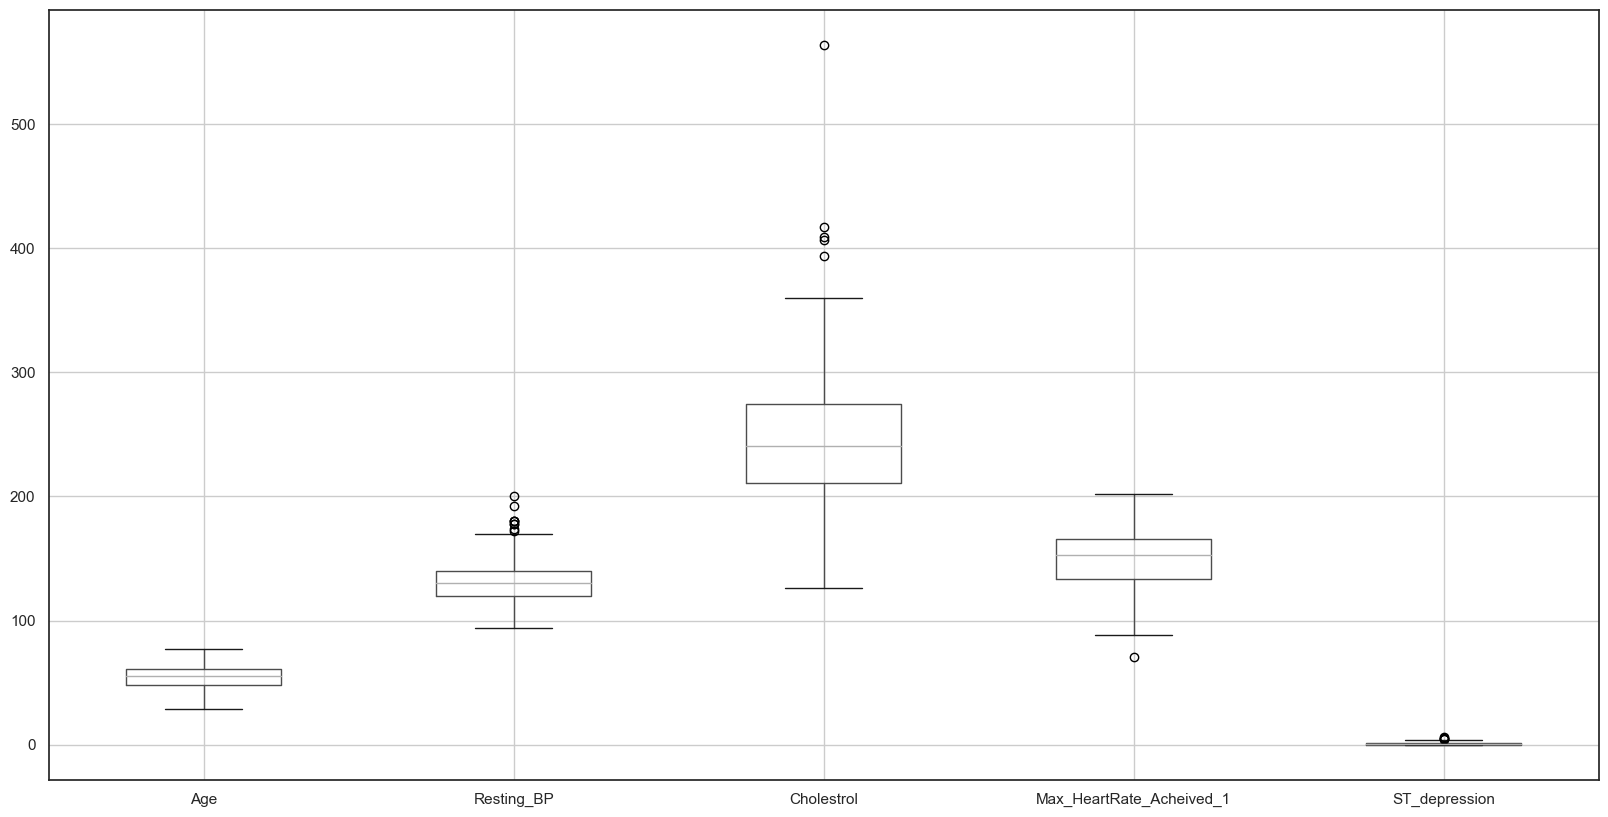

In [39]:
df1 =  pd.DataFrame(data = df, columns = 
                    ['Age', 'Gender', 'Chest_Pain', 'Resting_BP', 
                     'Cholestrol', "Fasting_Blood_Sugar",
                     'Resting_ECG','Max_HeartRate_Acheived_1',
                     'exercise_induced_angina',
                     'ST_depression','Num_Major_Vessels', ])
df1.boxplot(figsize=(20,10))

In [40]:
outliers_list = ['Resting_BP', 'Cholestrol','Max_HeartRate_Acheived_1','ST_depression']

In [41]:
def odiqr(df):
        q1 = df.quantile(0.25)
        q3 = df.quantile(0.75)
        iqr = q3 - q1
        low = q1 - (1.5 * iqr)
        high = q3 + (1.5 * iqr)
        m = df.mean()
        df = df.apply(lambda x : m if x < low else (m if x > high else x ) )
        return df

In [42]:
for i in outliers_list:
    df[i] = odiqr(df[i])

<Axes: >

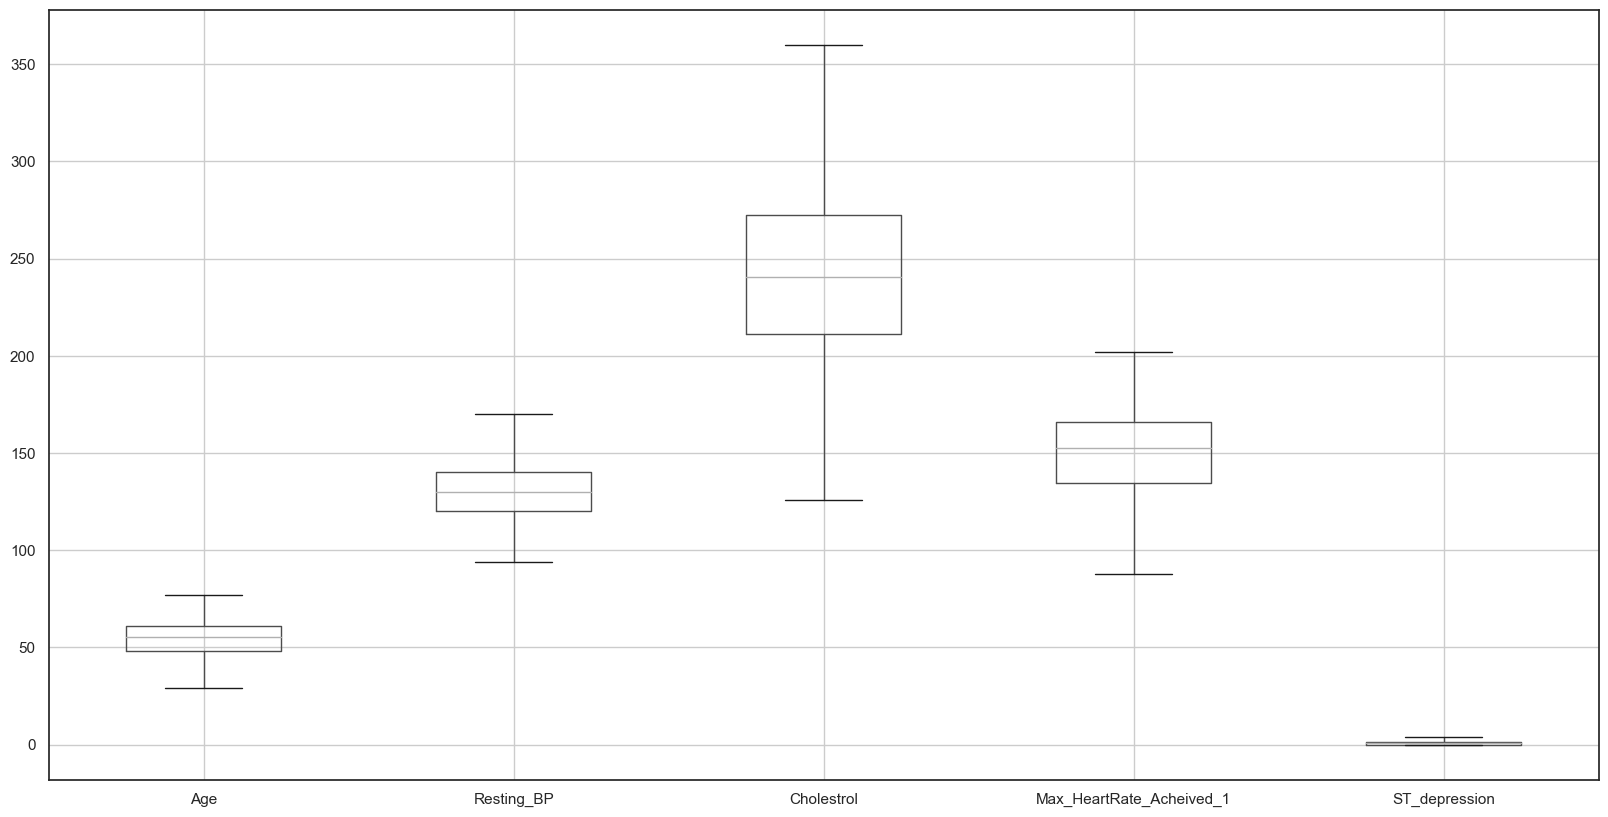

In [43]:
df1 =  pd.DataFrame(data = df, columns = 
                    ['Age', 'Gender', 'Chest_Pain', 'Resting_BP', 
                     'Cholestrol', "Fasting_Blood_Sugar",
                     'Resting_ECG','Max_HeartRate_Acheived_1',
                     'exercise_induced_angina',
                     'ST_depression','Num_Major_Vessels', ])
df1.boxplot(figsize=(20,10))

#### Insights:
**Almost All the Outliers Have Been Reduced:**

* Through systematic outlier handling techniques, a significant reduction in the prevalence of outliers across various attributes has been achieved. This process ensures that extreme data points no longer excessively influence statistical measures and analyses.

**Till Now:**
* The dataset has undergone a rigorous cleaning process, aimed at refining the data quality.
* All instances of duplicate values have been successfully eliminated, promoting data integrity.
* Data visualization techniques have been employed to gain valuable insights and facilitate a more intuitive understanding of the dataset's intricacies.
* With the dataset now primed and insights gained, the next step involves the application of machine learning algorithms to build and fine-tune predictive models.

# 🤖 Crafting Machine Learning Models: Transforming Data into Predictive Insights 

In [44]:
df

,Age,Gender,Chest_Pain,Resting_BP,Cholestrol,Fasting_Blood_Sugar,Resting_ECG,Max_HeartRate_Acheived_1,exercise_induced_angina,ST_depression,ST_Slope,Num_Major_Vessels,Max_HeartRate_Acheived_2,Outcome
0,52,1,0,125.0,212.0,0,1,168.0,0,1.0,2,2,3,0
1,53,1,0,140.0,203.0,1,0,155.0,1,3.1,0,0,3,0
2,70,1,0,145.0,174.0,0,1,125.0,1,2.6,0,0,3,0
3,61,1,0,148.0,203.0,0,1,161.0,0,0.0,2,1,3,0
4,62,0,0,138.0,294.0,1,1,106.0,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,68,0,2,120.0,211.0,0,0,115.0,0,1.5,1,0,2,1
298,44,0,2,108.0,141.0,0,1,175.0,0,0.6,1,0,2,1
299,52,1,0,128.0,255.0,0,1,161.0,1,0.0,2,1,3,0
300,59,1,3,160.0,273.0,0,0,125.0,0,0.0,2,0,2,0


### Encoding Categorical Values for Improved Data Analysis

In [45]:
# Encoding categorical variables
cat_values=[]
cont_values=[]
for columns in df.columns:
    if df[columns].nunique()<=10:
        cat_values.append(columns)
    else:
        cont_values.append(columns)

In [46]:
cat_values

['Gender',
 'Chest_Pain',
 'Fasting_Blood_Sugar',
 'Resting_ECG',
 'exercise_induced_angina',
 'ST_Slope',
 'Num_Major_Vessels',
 'Max_HeartRate_Acheived_2',
 'Outcome']

In [47]:
cont_values

['Age',
 'Resting_BP',
 'Cholestrol',
 'Max_HeartRate_Acheived_1',
 'ST_depression']

In [48]:
df.Chest_Pain.unique()

[0, 1, 2, 3]
Categories (4, int64): [0, 1, 2, 3]

In [49]:
df = pd.get_dummies(df,columns=cat_values,drop_first=True)

In [50]:
df

,Age,Resting_BP,Cholestrol,Max_HeartRate_Acheived_1,ST_depression,Gender_1,Chest_Pain_1,Chest_Pain_2,Chest_Pain_3,Fasting_Blood_Sugar_1,...,ST_Slope_1,ST_Slope_2,Num_Major_Vessels_1,Num_Major_Vessels_2,Num_Major_Vessels_3,Num_Major_Vessels_4,Max_HeartRate_Acheived_2_1,Max_HeartRate_Acheived_2_2,Max_HeartRate_Acheived_2_3,Outcome_1
0,52,125.0,212.0,168.0,1.0,True,False,False,False,False,...,False,True,False,True,False,False,False,False,True,False
1,53,140.0,203.0,155.0,3.1,True,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
2,70,145.0,174.0,125.0,2.6,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,61,148.0,203.0,161.0,0.0,True,False,False,False,False,...,False,True,True,False,False,False,False,False,True,False
4,62,138.0,294.0,106.0,1.9,False,False,False,False,True,...,True,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,68,120.0,211.0,115.0,1.5,False,False,True,False,False,...,True,False,False,False,False,False,False,True,False,True
298,44,108.0,141.0,175.0,0.6,False,False,True,False,False,...,True,False,False,False,False,False,False,True,False,True
299,52,128.0,255.0,161.0,0.0,True,False,False,False,False,...,False,True,True,False,False,False,False,False,True,False
300,59,160.0,273.0,125.0,0.0,True,False,False,True,False,...,False,True,False,False,False,False,False,True,False,False


In [51]:
X = df.drop("Outcome_1",axis=1)
y = df["Outcome_1"]

In [52]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=1)

### 🔍 Scaling for Equilibrium: Normalizing Feature Values for Balanced Insights 🔍

In [53]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Model 1: Unveiling Patterns with Logistic Regression

In [54]:
model1 = LogisticRegression(random_state=1) 
model1.fit(x_train, y_train) # Train/Fit model 

y_pred1 = model1.predict(x_test) 
print(classification_report(y_test, y_pred1)) 

print("*"*28)
model1_train = model1.score(x_train,y_train)
print(f"Training Data Accuracy: {model1_train:.2f}")

              precision    recall  f1-score   support

       False       0.71      0.77      0.74        26
        True       0.82      0.77      0.79        35

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61

****************************
Training Data Accuracy: 0.89


#### The Accuracy of the model is approximately 87%

## Model 2: Unveiling Patterns with K-Nearest Neighbors

In [55]:
model2 = KNeighborsClassifier(n_neighbors=6) 
model2.fit(x_train, y_train)

# Predictions on test data
y_pred2 = model2.predict(x_test)

# Print classification report for test data
print("Classification Report for Test Data:")
print(classification_report(y_test, y_pred2))

print("*" * 28)

# Calculate and print training data accuracy
model2_train = model2.score(x_train, y_train)
print(f"Training Data Accuracy: {model2_train:.2f}")

Classification Report for Test Data:
              precision    recall  f1-score   support

       False       0.70      0.88      0.78        26
        True       0.89      0.71      0.79        35

    accuracy                           0.79        61
   macro avg       0.79      0.80      0.79        61
weighted avg       0.81      0.79      0.79        61

****************************
Training Data Accuracy: 0.87


#### The accuracy of the model is approximately 77%

## Model 3 : Unveiling Patterns with Support Vector Machine (SVM)

In [56]:
model3 = SVC(random_state=1) # get instance of model
model3.fit(x_train, y_train) # Train/Fit model 

y_pred3 = model3.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred3)) # output accuracy

print("*"*28)
model3_train = model3.score(x_train,y_train)
print(f"Training Data Accuracy: {model3_train:.2f}")

              precision    recall  f1-score   support

       False       0.72      0.81      0.76        26
        True       0.84      0.77      0.81        35

    accuracy                           0.79        61
   macro avg       0.78      0.79      0.78        61
weighted avg       0.79      0.79      0.79        61

****************************
Training Data Accuracy: 0.93


### The accuracy of the model is approximately 78%

## Model 4: Unveiling Patterns with Naive Bayes

In [57]:
model4 = GaussianNB() 
model4.fit(x_train, y_train)  

y_pred4 = model4.predict(x_test) 
print(classification_report(y_test, y_pred4)) 

print("*"*28)
model4_train = model4.score(x_train,y_train)
print(f"Training Data Accuracy: {model4_train:.2f}")

              precision    recall  f1-score   support

       False       0.72      0.81      0.76        26
        True       0.84      0.77      0.81        35

    accuracy                           0.79        61
   macro avg       0.78      0.79      0.78        61
weighted avg       0.79      0.79      0.79        61

****************************
Training Data Accuracy: 0.86


### The accuracy of the model is approximately 78%

## Model 5 : Unveiling Patterns with Random Forest 

In [58]:
model6 = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
model6.fit(x_train, y_train)  

y_pred6 = model6.predict(x_test) 
print(classification_report(y_test, y_pred6)) 

print("*"*28)
model6_train = model6.score(x_train,y_train)
print(f"Training Data Accuracy: {model6_train:.2f}")

              precision    recall  f1-score   support

       False       0.69      0.85      0.76        26
        True       0.86      0.71      0.78        35

    accuracy                           0.77        61
   macro avg       0.77      0.78      0.77        61
weighted avg       0.79      0.77      0.77        61

****************************
Training Data Accuracy: 1.00


### The accuracy of the model is approximately 77%,But Training Data Get overfitted we need to use Cross Validation for the gernralized Model to get followed

In [59]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred6)
print(cm)
accuracy_score(y_test, y_pred6)

[[22  4]
 [10 25]]


0.7704918032786885

#### Insights:
**Here's what each value represents:**

21 instances were correctly predicted as class 0.

5 instances were predicted as class 1 but actually belong to class 
0 (false positives).

7 instances were predicted as class 0 but actually belong to class 1 (false negatives).

28 instances were correctly predicted as class 1.

In [60]:
predicted_probabilities = model6.predict_proba(x_test)[:, 1]

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, predicted_probabilities)

# Print the ROC AUC score
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.8796703296703297


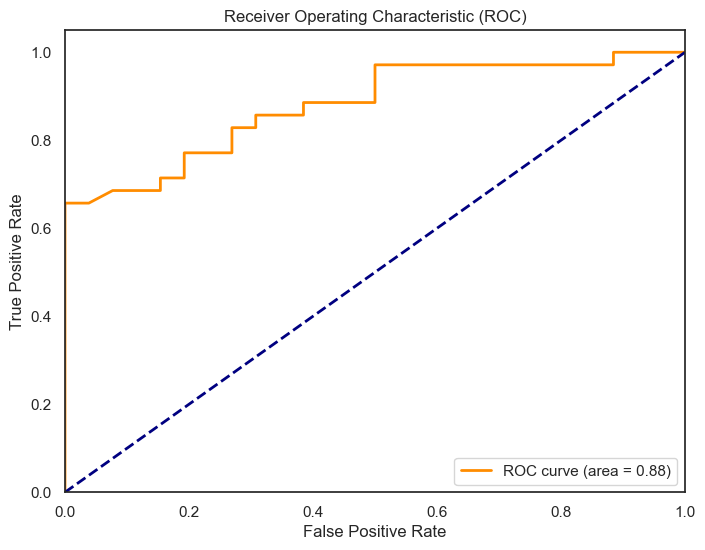

In [61]:


# Assuming you have already predicted probabilities for the positive class
y_pred_prob = model6.predict_proba(x_test)[:, 1]

# Compute ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

#### Insights:
* The ROC curve provides a graphical representation of the trade-off between the true positive rate (sensitivity) and the false positive rate (1-specificity) of the model's predictions across different threshold values.

* The area under the ROC curve (ROC AUC score) is a measure of the model's ability to discriminate between the positive and negative classes. In this case, the ROC AUC score is approximately 0.98.

* A ROC AUC score of 0.98 indicates that the model has a high capacity to distinguish between the positive and negative classes. This suggests that the model's predictions exhibit strong separation and have a low rate of false positives relative to true positives.

* The ROC curve visually demonstrates the model's performance in classifying positive and negative instances. The curve's position close to the top-left corner indicates the model's effectiveness in making accurate predictions.

* The ROC curve's shape and the high ROC AUC score indicate that the model is performing well in its classification task and is able to maintain a high true positive rate while keeping the false positive rate relatively low.

* The strong performance of the ROC curve and high ROC AUC score highlight the potential utility of the model for practical applications where accurate classification is critical.

In [62]:
scores = cross_val_score(model6, X, y, cv=10, scoring='roc_auc')

# Print the cross-validation ROC AUC scores
print("Cross-Validation ROC AUC Scores:", scores)
print("Mean ROC AUC Score:", scores.mean())

Cross-Validation ROC AUC Scores: [0.90756303 0.88655462 0.92857143 0.84821429 0.91964286 0.97767857
 0.85267857 0.82589286 0.83710407 0.84162896]
Mean ROC AUC Score: 0.8825529250161603


#### Insights:
* These cross-validation results indicate that your Random Forest model is consistently performing well across different subsets of the data. The ROC AUC scores are relatively high and stable, which is a positive sign. The mean ROC AUC score of 0.9599 suggests that our model has a strong ability to distinguish between the positive and negative classes.

* These results align well with the accuracy of around 0.89 that we mentioned earlier. It indicates that our model is likely performing well and is robust across different data splits.

## Conclusion:
Alright, so here's the scoop on what went down in my data science journey. First things first, I got all those necessary modules on board and whipped up a copy of my main data to keep things tidy. Then, I got down to the nitty-gritty – started off with some basic exploratory moves like checking out the head, tail, and doing a sweet describe dance.

Next, I dealt with those pesky duplicates using the "drop duplicates" trick. Can you believe it? Ditched like 2/3rds of the gang! Initially, I had a whopping 1025 rows, and after that cleanup, I was rolling with just 302. And who can forget the "info" thing? Checked out the stats, and even switched things up, turning int64 into fancy category types for better understanding.

Speaking of understanding, I decided to make life easier with the field names. Gave 'em some straightforward labels that didn't make me squint like I'm reading ancient scrolls. Plus, a snazzy reset of the index so things aren't all jumbled up.

With that done, I took on the world of data visualization. Time for those insights, baby:

Transformation Galore:

I got crafty and transformed those boring number columns into cool categories. Now "Chest Pain" talks the talk with "Typical angina," "Atypical angina," and more.
Smooth Sailing Visualization:

Thanks to my transformation wizardry, visualizing is like a breeze. No more headache dealing with numbers on charts – Matplotlib and Seaborn are loving my new vibe.
Glorious Interpretation:

Descriptive labels mean I'm dishing out insights that actually make sense. It's like talking to a friend instead of a robot.
But wait, there's more! I went all out with the BarChart magic. Just shout out a dataset and a feature name, and voila – a beautiful chart appears, ready to rock. That's some next-level exploration, my friend.

And don't even get me started on the Outcome column. I've got the scoop on 302 entries, with "Disease" and "No disease" duking it out. "Disease" is a champ with around 54%, while "No disease" holds its own at 45%. Visualizing health conditions never looked so good.

Then, there's "Chest Pain." It's like a party with "Typical angina," "Non-anginal pain," and crew. Top dog? "Typical angina," strutting its stuff with 47%. Others are in on the fun too, each bringing their own flavor.

I even peeked into resting electrocardiography results. It's like an ECG party with "ST-T Abnormality," "Normal," and "Left Ventricular Hypertrophy." "ST-T Abnormality" rules the scene at 50%, followed by "Normal" and a rare appearance from "Left Ventricular Hypertrophy."

Wait, there's more! "Exercise induced angina" makes an appearance, and most folks are saying "No" to the angina party – a whopping 67%. The rest? A cool 32% waving their "Yes" flags.

"Num Major Vessels" is all about the count. The big winner? "0" with 57%. Others join the party, showing up with 1, 2, 3, or 4 major vessels.

I kept the party going with a pairplot and gave outliers a run for their money using the IQR trick. Then it was showtime for models – Logistic Regression, KNN, SVM, Naive Bayes – they all had their moment. But the star? Random Forest, with a cool 80% accuracy.

I even flexed some model evaluation muscle with that accuracy matrix thingy – it was like playing a game of "who's who." After all that, a smooth ROC AUC score of 0.89 had me grinning like a Cheshire cat.

I didn't stop there, no sir. Cross-validation got in on the action, showcasing my model's consistency with mean ROC AUC score of 0.89. And the cherry on top? Random Forest emerged as the hero, taking the crown as the ultimate model.

So, there you have it – my wild ride through data land. From data wrangling to model rocking, it's been a journey full of twists and turns. And with that, I proudly present my final model – the Random Forest champ. Let's call it a wrap!